In [3]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
def gradient_descent(w1,w2,x,y,learn_rate = 0.01,max_iterate=1000):
  for i in range(max_iterate): # iteration loop
    w1 = w1 - learn_rate * grad_w1( w1, w2, x, y)
    w2 = w2 - learn_rate * grad_w2( w1, w2, x, y)
    w1array.append(w1)
    w2array.append(w2)
  return w1,w2

def grad_w1(w1,w2,x,y):
  N = len(x)
  grad = 0.0
  for x,y in zip (x,y): # iterates thru x,y simultaneously
    grad += dx_w1(w1,w2,x,y)
  return grad/N

def grad_w2(w1,w2,x,y):
  N = len(x)
  grad = 0.0
  for x,y in zip (x,y):
    grad += dx_w2(w1,w2,x,y)
  return grad/N

def dx_w1(w1,w2,x,y):
  return 2.*(f(w1,w2,x)-y)

def dx_w2(w1,w2,x,y):
  return 2.*x*(f(w1,w2,x)-y)

def f(w1,w2,x): # fit function
  return w1+w2*x

Text(0.5, 1.0, 'galaxy distance versus red shift ')

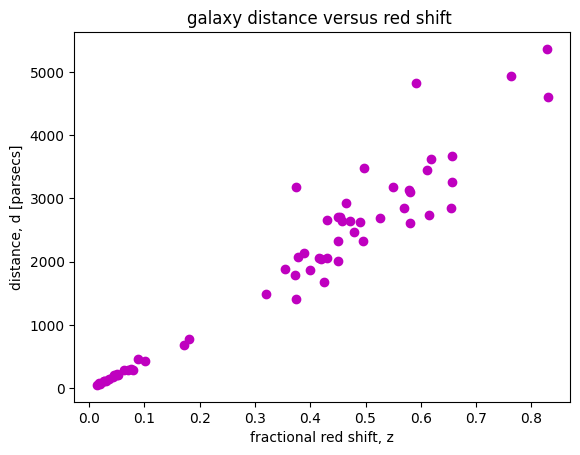

In [5]:
#hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble-low-z.txt")
hubbledata = np.loadtxt("/content/drive/MyDrive/Courses/phy508/hubble.txt")
x = hubbledata[:,0]
y = hubbledata[:,1]
N = x.size

plt.plot( x, y, 'mo')
plt.xlabel("fractional red shift, z")
plt.ylabel("distance, d [parsecs]")
plt.title('galaxy distance versus red shift ')

In [6]:
M = np.column_stack( (x,np.ones(N)))             # define matrix M
npar = 2
M = np.column_stack( (x**2,x,np.ones(N)))             # define matrix M
npar = 3

# dot() returns products, transpose() returns transpose, inv() returns inverse
MTM = np.dot( M.transpose(), M)                  # 2x2 matrix
MTMINV = np.linalg.inv(MTM)                      # 2x2 matrx
MTY = np.dot(M.transpose(),y)                    # 2-element vector

594.4940868335792 3854.737588201538


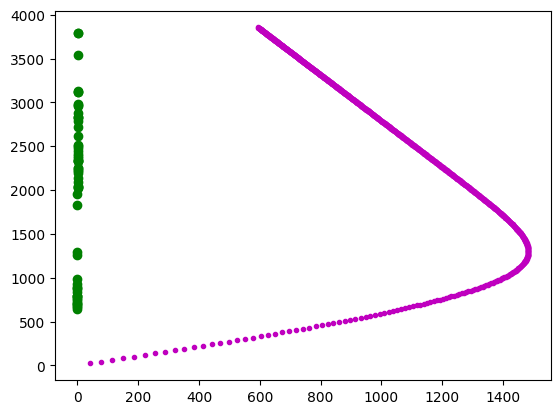

In [12]:
w1array, w2array = [],[]
w10,w20 = 1.0, 1.1
w1,w2 = gradient_descent(w10,w20,x,y)
yf= w1+w2*x
plt.plot(w1array,w2array,"m.")
print(w1,w2)
#plt.plot(x,y,'mo')
#plt.plot(x,yf,'go')

In [8]:
pars = np.dot(MTMINV,MTY)
yf =  np.dot(M,pars)
residuals = yf-y
chisq = np.sum(residuals**2)
var = chisq / (N-npar)
covs = MTMINV*var

HoINV = pars[0]*3.26e6 # conversion factor 3.26r6 c-yr / c
print("Hubble time billion years", HoINV*1e-9)
print("curvature = ",pars[0]," +/- ",np.sqrt(covs[0,0]))
print("slope = ",pars[1]," +/- ",np.sqrt(covs[1,1]))
print("ofdset = ",pars[2]," +/- ",np.sqrt(covs[2,2]))
print("chisq/ndf",var)

Hubble time billion years 5.033473356668769
curvature =  1544.0102321069844  +/-  975.41848025345
slope =  4685.4692793871745  +/-  710.4172951719962
ofdset =  -29.323612991683422  +/-  112.16731818679975
chisq/ndf 154639.71935540883


Text(0.5, 1.0, 'galaxy distance versus red shift ')

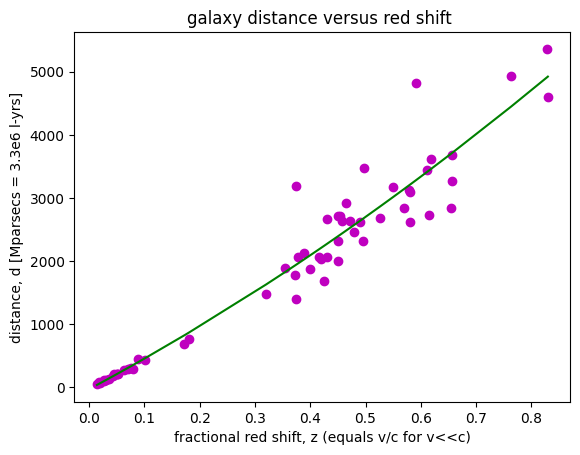

In [9]:
plt.plot(x,y,'mo')
yf =  np.dot(M,pars)
plt.plot(x,yf,"g-")
plt.xlabel("fractional red shift, z (equals v/c for v<<c)" )
plt.ylabel("distance, d [Mparsecs = 3.3e6 l-yrs]")
plt.title('galaxy distance versus red shift ')